# Anexo 5


## 1.  Instalaciones necesarias


In [ ]:
%%capture
!pip install nnunetv2

In [ ]:
import torch
import nibabel as nib
import numpy as np
import pandas as pd
import os
import pathlib
import json

In [ ]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2. Preprocesamiento de imagenes

In [ ]:
import os
os.environ["nnUNet_raw"]="/content/drive/MyDrive/saros/nnUNet/nnUNet_raw"
os.environ["nnUNet_preprocessed"]="/content/drive/MyDrive/saros/nnUNet/nnUNet_preprocessed"
os.environ["nnUNet_results"]="/content/drive/MyDrive/saros/nnUNet/nnUNet_results"

In [ ]:
!nnUNetv2_plan_and_preprocess -d 002 --verify_dataset_integrity

Fingerprint extraction...
Dataset002_ToothFairy2
Using <class 'nnunetv2.imageio.simpleitk_reader_writer.SimpleITKIO'> as reader/writer

####################
verify_dataset_integrity Done. 
If you didn't see any error messages then your dataset is most likely OK!
####################

Using <class 'nnunetv2.imageio.simpleitk_reader_writer.SimpleITKIO'> as reader/writer
100% 547/547 [00:31<00:00, 17.50it/s]
Experiment planning...

############################
INFO: You are using the old nnU-Net default planner. We have updated our recommendations. Please consider using those instead! Read more here: https://github.com/MIC-DKFZ/nnUNet/blob/master/documentation/resenc_presets.md
############################

2D U-Net configuration:
{'data_identifier': 'nnUNetPlans_2d', 'preprocessor_name': 'DefaultPreprocessor', 'batch_size': 16, 'patch_size': (448, 448), 'median_image_size_in_voxels': array([410., 410.]), 'spacing': array([1., 1.]), 'normalization_schemes': ['ZScoreNormalization'], 'use_m

## 3. Entrenamiento

### 3.1 Clase de entrenador personalizada

Para solucionar el problema de tener un número predeterminado de 1000 épocas en nnUNet, se crea una nueva clase de entrenador personalizada llamada "nnUNetTrainer_1epoch". Esta clase hereda las propiedades de la clase original, pero sobrescribe el número de épocas, estableciéndolo en 1.

In [ ]:
from nnunetv2.training.nnUNetTrainer.nnUNetTrainer import nnUNetTrainer

class nnUNetTrainer_1epoch(nnUNetTrainer):
    def __init__(self, plans: dict, configuration: str, fold: int, dataset_json: dict, unpack_dataset: bool = True,
                 device: torch.device = torch.device('cuda')):
        """used for debugging plans etc"""
        super().__init__(plans, configuration, fold, dataset_json, unpack_dataset, device)
        self.num_epochs = 1

### 3.2 Entrenamiento con folds 0-4

En nnUNet no se utiliza un conjunto de validación tradicional. En lugar de eso, se emplea una validación cruzada con 5 folds. Esto significa que el entrenamiento se ejecuta cinco veces, cada vez utilizando un fold diferente como conjunto de validación y los otros cuatro folds como conjunto de entrenamiento. Este enfoque ayuda a evaluar la robustez y la generalización del modelo.

Al ejecutar el entrenamiento, especificamos cada uno de los folds. Además, indicamos el parámetro --npz, que le dice a nnUNet que almacene las salidas softmax durante la validación final. Esto es necesario porque, después del entrenamiento, vamos a pedirle a nnUNet que elija la mejor configuración.

#### Fold 0

In [ ]:
# Set up environment variables
os.environ["nnUNet_raw"]="/content/drive/MyDrive/saros/nnUNet/nnUNet_raw"
os.environ["nnUNet_preprocessed"]="/content/drive/MyDrive/saros/nnUNet/nnUNet_preprocessed"
os.environ["nnUNet_results"]="/content/drive/MyDrive/saros/nnUNet/nnUNet_results"
!nnUNetv2_train Dataset002_ToothFairy2 2d 0 --npz -tr nnUNetTrainer_1epoch


############################
INFO: You are using the old nnU-Net default plans. We have updated our recommendations. Please consider using those instead! Read more here: https://github.com/MIC-DKFZ/nnUNet/blob/master/documentation/resenc_presets.md
############################

Using device: cuda:0

#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

2024-05-28 15:02:49.677143: do_dummy_2d_data_aug: False
2024-05-28 15:02:49.707032: Using splits from existing split file: /content/drive/MyDrive/saros/nnUNet/nnUNet_preprocessed/Dataset002_ToothFairy2/splits_final.json
2024-05-28 15:02:49.711857: The split file contains 5 splits.
2024-05-28 15:

#### Fold 1

In [ ]:
# Set up environment variables
os.environ["nnUNet_raw"]="/content/drive/MyDrive/saros/nnUNet/nnUNet_raw"
os.environ["nnUNet_preprocessed"]="/content/drive/MyDrive/saros/nnUNet/nnUNet_preprocessed"
os.environ["nnUNet_results"]="/content/drive/MyDrive/saros/nnUNet/nnUNet_results"
!nnUNetv2_train Dataset002_ToothFairy2 2d 1 --npz -tr nnUNetTrainer_1epoch


############################
INFO: You are using the old nnU-Net default plans. We have updated our recommendations. Please consider using those instead! Read more here: https://github.com/MIC-DKFZ/nnUNet/blob/master/documentation/resenc_presets.md
############################

Using device: cuda:0

#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

2024-05-28 15:11:07.537136: do_dummy_2d_data_aug: False
2024-05-28 15:11:07.576179: Using splits from existing split file: /content/drive/MyDrive/saros/nnUNet/nnUNet_preprocessed/Dataset002_ToothFairy2/splits_final.json
2024-05-28 15:11:07.580638: The split file contains 5 splits.
2024-05-28 15:

#### Fold 2

In [ ]:
# Set up environment variables
os.environ["nnUNet_raw"]="/content/drive/MyDrive/saros/nnUNet/nnUNet_raw"
os.environ["nnUNet_preprocessed"]="/content/drive/MyDrive/saros/nnUNet/nnUNet_preprocessed"
os.environ["nnUNet_results"]="/content/drive/MyDrive/saros/nnUNet/nnUNet_results"

!nnUNetv2_train Dataset002_ToothFairy2 2d 2 --npz -tr nnUNetTrainer_1epoch


############################
INFO: You are using the old nnU-Net default plans. We have updated our recommendations. Please consider using those instead! Read more here: https://github.com/MIC-DKFZ/nnUNet/blob/master/documentation/resenc_presets.md
############################

Using device: cuda:0

#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

2024-05-28 15:17:50.083950: do_dummy_2d_data_aug: False
2024-05-28 15:17:50.121242: Using splits from existing split file: /content/drive/MyDrive/saros/nnUNet/nnUNet_preprocessed/Dataset002_ToothFairy2/splits_final.json
2024-05-28 15:17:50.126234: The split file contains 5 splits.
2024-05-28 15:

#### Fold 3

In [ ]:
# Set up environment variables
os.environ["nnUNet_raw"]="/content/drive/MyDrive/saros/nnUNet/nnUNet_raw"
os.environ["nnUNet_preprocessed"]="/content/drive/MyDrive/saros/nnUNet/nnUNet_preprocessed"
os.environ["nnUNet_results"]="/content/drive/MyDrive/saros/nnUNet/nnUNet_results"
!nnUNetv2_train Dataset002_ToothFairy2 2d 3 --npz -tr nnUNetTrainer_1epoch


############################
INFO: You are using the old nnU-Net default plans. We have updated our recommendations. Please consider using those instead! Read more here: https://github.com/MIC-DKFZ/nnUNet/blob/master/documentation/resenc_presets.md
############################

Using device: cuda:0

#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

2024-05-28 15:23:41.564083: do_dummy_2d_data_aug: False
2024-05-28 15:23:41.607317: Using splits from existing split file: /content/drive/MyDrive/saros/nnUNet/nnUNet_preprocessed/Dataset002_ToothFairy2/splits_final.json
2024-05-28 15:23:41.618785: The split file contains 5 splits.
2024-05-28 15:

#### Fold 4

In [ ]:
# Set up environment variables
os.environ["nnUNet_raw"]="/content/drive/MyDrive/saros/nnUNet/nnUNet_raw"
os.environ["nnUNet_preprocessed"]="/content/drive/MyDrive/saros/nnUNet/nnUNet_preprocessed"
os.environ["nnUNet_results"]="/content/drive/MyDrive/saros/nnUNet/nnUNet_results"
!nnUNetv2_train Dataset002_ToothFairy2 2d 4 --npz -tr nnUNetTrainer_1epoch


############################
INFO: You are using the old nnU-Net default plans. We have updated our recommendations. Please consider using those instead! Read more here: https://github.com/MIC-DKFZ/nnUNet/blob/master/documentation/resenc_presets.md
############################

Using device: cuda:0

#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

2024-05-28 15:29:32.964084: do_dummy_2d_data_aug: False
2024-05-28 15:29:33.006796: Using splits from existing split file: /content/drive/MyDrive/saros/nnUNet/nnUNet_preprocessed/Dataset002_ToothFairy2/splits_final.json
2024-05-28 15:29:33.016733: The split file contains 5 splits.
2024-05-28 15:

### 3.3 Encontrar la mejor configuración de entrenamiento

In [ ]:
import os
os.environ["nnUNet_raw"]="/content/drive/MyDrive/saros/nnUNet/nnUNet_raw"
os.environ["nnUNet_preprocessed"]="/content/drive/MyDrive/saros/nnUNet/nnUNet_preprocessed"
os.environ["nnUNet_results"]="/content/drive/MyDrive/saros/nnUNet/nnUNet_results"

In [ ]:
!nnUNetv2_find_best_configuration Dataset002_ToothFairy2 -c 2d -tr nnUNetTrainer_1epoch


***All results:***
nnUNetTrainer_1epoch__nnUNetPlans__2d: 0.12887671802268819

*Best*: nnUNetTrainer_1epoch__nnUNetPlans__2d: 0.12887671802268819

***Determining postprocessing for best model/ensemble***
Removing all but the largest foreground region did not improve results!
Removing all but the largest component for 1 did not improve results! Dice before: 0.40021 after: 0.26004
Removing all but the largest component for 2 did not improve results! Dice before: 0.06179 after: 0.04279
Removing all but the largest component for (11, 12, 13, 14, 15, 16, 17, 18, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38, 41, 42, 43, 44, 45, 46, 47, 48) did not improve results! Dice before: 0.0 after: 0.0
Removing all but the largest component for (3, 4, 5, 6, 7, 8, 9, 10, 18, 19, 20, 29, 30, 38, 39, 40) did not improve results! Dice before: 0.05351 after: 0.05317

***Run inference like this:***

nnUNetv2_predict -d Dataset002_ToothFairy2 -i INPUT_FOLDER -o OUTPUT_FOLDER -f  0 1 2 3 4 -

### 3.4. Resultados de entrenamiento

NnUNet no proporciona una función específica para visualizar métricas de entrenamiento en tiempo real, pero guarda estos datos en archivos de registro. Por ejemplo los datos en el archivo "summary.json" en la carpeta "crossval_results_folds_0_1_2_3_4" contienen las métricas de evaluación del entrenamiento cruzado.

In [ ]:
directorio = '/content/drive/MyDrive/saros/nnUNet/nnUNet_results/Dataset002_ToothFairy2/nnUNetTrainer_1epoch__nnUNetPlans__2d/crossval_results_folds_0_1_2_3_4/'

# Comprobar si el directorio existe
os.path.exists(directorio)

True

In [ ]:
# Ruta al archivo summary.json
nombre_archivo = 'summary.json'
# Unir directorio y nombre del archivo
summary_file = os.path.join(directorio, nombre_archivo)

def load_summary(json_path):
    with open(json_path, 'r') as file:
        summary = json.load(file)
    return summary

def display_metrics_table(metrics):
    df = pd.DataFrame(metrics, index=[0])
    return df

# Cargar las métricas del archivo JSON
summary = load_summary(summary_file)

# Extraer las métricas de foreground_mean
foreground_mean = summary['foreground_mean']

# Mostrar las métricas en una tabla
metrics_table = display_metrics_table(foreground_mean)
metrics_table

,Dice,FN,FP,IoU,TN,TP,n_pred,n_ref
0,0.128877,2645.494059,1214.254113,0.085621,163551.708867,688.542962,1902.797075,3334.03702


## 4. Predicción utilizando conjunto de test

### 4.1 inferencia

Realizamos predicciones utilizando un modelo previamente entrenado en el conjunto de datos utilisando clase de entrenador personalizado. Guardamos los resultados en la carpeta "inferencia"

In [ ]:
!nnUNetv2_predict -d Dataset002_ToothFairy2 -i /content/drive/MyDrive/saros/nnUNet/nnUNet_raw/Dataset002_ToothFairy2/imagesTs -o /content/drive/MyDrive/saros/nnUNet/nnUNet_results/Dataset002_ToothFairy2/inference -f  0 1 2 3 4 -tr nnUNetTrainer_1epoch -c 2d -p nnUNetPlans


#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

There are 274 cases in the source folder
I am process 0 out of 1 (max process ID is 0, we start counting with 0!)
There are 274 cases that I would like to predict

Predicting ToothFairy2F_051000:
perform_everything_on_device: True
100% 1/1 [00:01<00:00,  1.09s/it]
100% 1/1 [00:00<00:00, 25.22it/s]
100% 1/1 [00:00<00:00, 28.02it/s]
100% 1/1 [00:00<00:00, 24.36it/s]
100% 1/1 [00:00<00:00, 12.49it/s]
sending off prediction to background worker for resampling and export
done with ToothFairy2F_051000

Predicting ToothFairy2F_051001:
perform_everything_on_device: True
100% 1/1 [00:00<00:00, 27.24

### 4.2 Postprocesamiento


Ahora ejecutemos el paso de postprocesamiento para generar los archivos de segmentación final utilizando el mejor modelo determinado por nnUNet en función del puntaje DICE. La carpeta de entrada es nuestra carpeta de "inferencia", y la carpeta de salida es una carpeta "postprocesamiento".

In [ ]:
!nnUNetv2_apply_postprocessing -i /content/drive/MyDrive/saros/nnUNet/nnUNet_results/Dataset002_ToothFairy2/inference -o /content/drive/MyDrive/saros/nnUNet/nnUNet_results/Dataset002_ToothFairy2/postprocessing -pp_pkl_file /content/drive/MyDrive/saros/nnUNet/nnUNet_results/Dataset002_ToothFairy2/nnUNetTrainer_1epoch__nnUNetPlans__2d/crossval_results_folds_0_1_2_3_4/postprocessing.pkl -np 8 -plans_json /content/drive/MyDrive/saros/nnUNet/nnUNet_results/Dataset002_ToothFairy2/nnUNetTrainer_1epoch__nnUNetPlans__2d/crossval_results_folds_0_1_2_3_4/plans.json

### 4.3. Resultados de test

In [ ]:
!nnUNetv2_evaluate_folder -h

usage: nnUNetv2_evaluate_folder [-h] -djfile DJFILE -pfile PFILE [-o O] [-np NP] [--chill]
                                gt_folder pred_folder

positional arguments:
  gt_folder       folder with gt segmentations
  pred_folder     folder with predicted segmentations

options:
  -h, --help      show this help message and exit
  -djfile DJFILE  dataset.json file
  -pfile PFILE    plans.json file
  -o O            Output file. Optional. Default: pred_folder/summary.json
  -np NP          number of processes used. Optional. Default: 8
  --chill         dont crash if folder_pred does not have all files that are present in folder_gt


In [ ]:
FOLDER_IMAGES_TEST='/content/drive/MyDrive/saros/nnUNet/nnUNet_raw/Dataset002_ToothFairy2/imagesTs'
FOLDER_LABELS_TEST_GT='/content/drive/MyDrive/saros/nnUNet/nnUNet_raw/Dataset002_ToothFairy2/labelsTs'
FOLDER_LABELS_TEST_PREDICTIONS='/content/drive/MyDrive/saros/nnUNet/nnUNet_results/Dataset002_ToothFairy2/postprocessing'
DJFILE_TEST_PREDICTIONS='/content/drive/MyDrive/saros/nnUNet/nnUNet_results/Dataset002_ToothFairy2/nnUNetTrainer_1epoch__nnUNetPlans__2d/dataset.json'
PFILE_TEST_PREDICTIONS='/content/drive/MyDrive/saros/nnUNet/nnUNet_results/Dataset002_ToothFairy2/nnUNetTrainer_1epoch__nnUNetPlans__2d/plans.json'

!nnUNetv2_evaluate_folder $FOLDER_LABELS_TEST_GT $FOLDER_LABELS_TEST_PREDICTIONS -djfile $DJFILE_TEST_PREDICTIONS -pfile $PFILE_TEST_PREDICTIONS

# Ruta al archivo summary.json
nombre_archivo = 'summary.json'
# Unir directorio y nombre del archivo
summary_file = os.path.join(FOLDER_LABELS_TEST_PREDICTIONS, nombre_archivo)

def load_summary(json_path):
    with open(json_path, 'r') as file:
        summary = json.load(file)
    return summary

def display_metrics_table(metrics):
    df = pd.DataFrame(metrics, index=[0])
    return df

# Cargar las métricas del archivo JSON
summary = load_summary(summary_file)

# Extraer las métricas de foreground_mean
foreground_mean = summary['foreground_mean']

# Mostrar las métricas en una tabla
metrics_table = display_metrics_table(foreground_mean)
metrics_table

Using <class 'nnunetv2.imageio.simpleitk_reader_writer.SimpleITKIO'> as reader/writer


,Dice,FN,FP,IoU,TN,TP,n_pred,n_ref
0,0.161049,2931.186131,1037.612226,0.123197,162992.421533,1138.780109,2176.392336,4069.966241


In [ ]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
import os
from matplotlib.colors import ListedColormap

def show_two_nii_images(file_name1, file_name2, file_name3, ruta_imagen_test, ruta_label_test, ruta_label_predicho):
    """
    Muestra dos imágenes .nii.gz en una sola línea.

    Args
        file_name1 (str): imagen de test.nii.gz (sin ruta).
        file_name2 (str): label de test .nii.gz (sin ruta).
        file_name3 (str): label predicho .nii.gz (sin ruta).
        slice_index (int): Índice de la slice a mostrar (por defecto es 0).
    """
    # Directorios predeterminados
    image_dir1 = ruta_imagen_test
    image_dir2 = ruta_label_test
    image_dir3 = ruta_label_predicho

    # Construir las rutas completas de los archivos
    image_path1 = os.path.join(image_dir1, file_name1)
    image_path2 = os.path.join(image_dir2, file_name2)
    image_path3 = os.path.join(image_dir3, file_name3)

    print(image_path1)
    print(image_path2)
    print(image_path3)

    # Leer imágenes
    image1 = sitk.ReadImage(image_path1)
    image2 = sitk.ReadImage(image_path2)
    image3 = sitk.ReadImage(image_path3)

    # Convertir las imágenes a arrays numpy y reformatear
    image_array1 = sitk.GetArrayFromImage(image1)
    image_array2 = sitk.GetArrayFromImage(image2)
    image_array3 = sitk.GetArrayFromImage(image3)

    # Colores distintivos para las clases
    cmap = ListedColormap(['black','red', 'blue', 'green', 'orange'])

   # Mostrar las imágenes
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Ajusta el tamaño de la figura
    plt.subplots_adjust(wspace=0.3)  # Ajusta el espaciado entre subgráficos

    # Primera imagen
    axes[0].imshow(image_array1, cmap='gray')  # Muestra la imagen en escala de grises
    axes[0].set_title('Imagen de Test')

    # Segunda imagen
    im = axes[1].imshow(image_array2, cmap=cmap, vmin=0, vmax=4)  # Muestra la imagen de label de test
    axes[1].set_title('Etiqueta original')

    # Tercera imagen
    axes[2].imshow(image_array3, cmap=cmap, vmin=0, vmax=4)  # Muestra la imagen de label predicho
    axes[2].set_title('Etiqueta predicha')

    # Crear y mostrar leyenda independiente
    legend_labels = ['Background', 'Lower Jawbone', 'Upper Jawbone', 'Teeth', 'Resto']
    cbar = fig.colorbar(im, ax=axes.ravel().tolist(), ticks=[0, 1, 2, 3, 4], orientation='vertical', label='Clase')
    cbar.ax.set_yticklabels(legend_labels)

    plt.show()

### 4.4 Visualisaciones: imagen de test, etiqueta original y etiqueta predicha

/content/drive/MyDrive/saros/nnUNet/nnUNet_raw/Dataset002_ToothFairy2/imagesTs/ToothFairy2F_051050_0000.nii.gz
/content/drive/MyDrive/saros/nnUNet/nnUNet_raw/Dataset002_ToothFairy2/labelsTs/ToothFairy2F_051050.nii.gz
/content/drive/MyDrive/saros/nnUNet/nnUNet_results/Dataset002_ToothFairy2/postprocessing/ToothFairy2F_051050.nii.gz


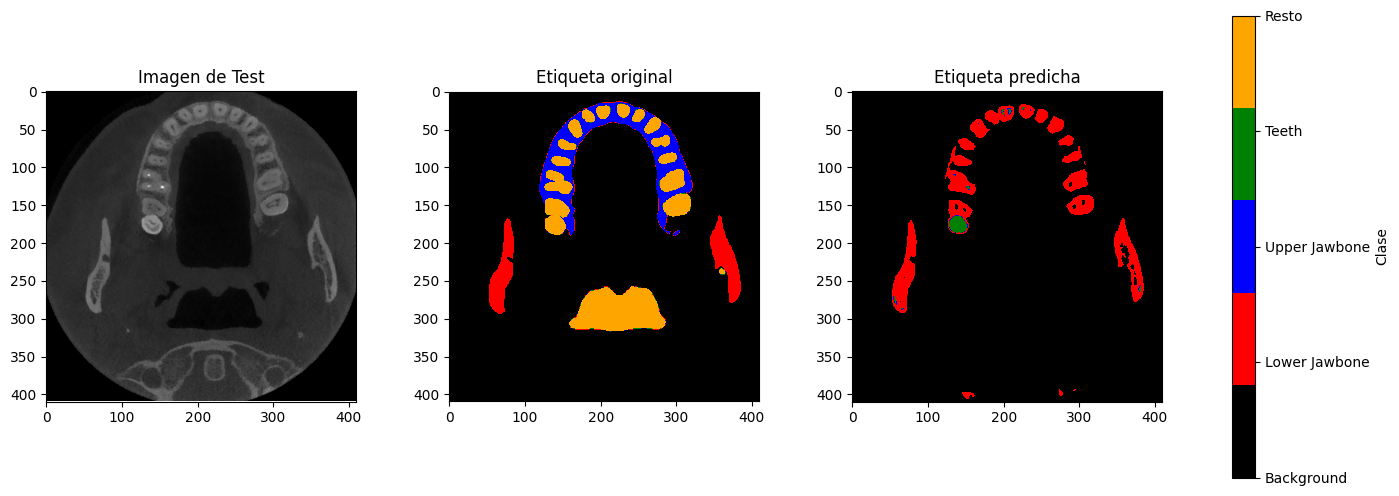

In [ ]:
# Ejemplo de uso de la función
file_name1 = 'ToothFairy2F_051050_0000.nii.gz'
file_name2 = 'ToothFairy2F_051050.nii.gz'
file_name3 = 'ToothFairy2F_051050.nii.gz'
show_two_nii_images(file_name1, file_name2, file_name3, FOLDER_IMAGES_TEST, FOLDER_LABELS_TEST_GT, FOLDER_LABELS_TEST_PREDICTIONS)

/content/drive/MyDrive/saros/nnUNet/nnUNet_raw/Dataset002_ToothFairy2/imagesTs/ToothFairy2F_051100_0000.nii.gz
/content/drive/MyDrive/saros/nnUNet/nnUNet_raw/Dataset002_ToothFairy2/labelsTs/ToothFairy2F_051100.nii.gz
/content/drive/MyDrive/saros/nnUNet/nnUNet_results/Dataset002_ToothFairy2/postprocessing/ToothFairy2F_051100.nii.gz


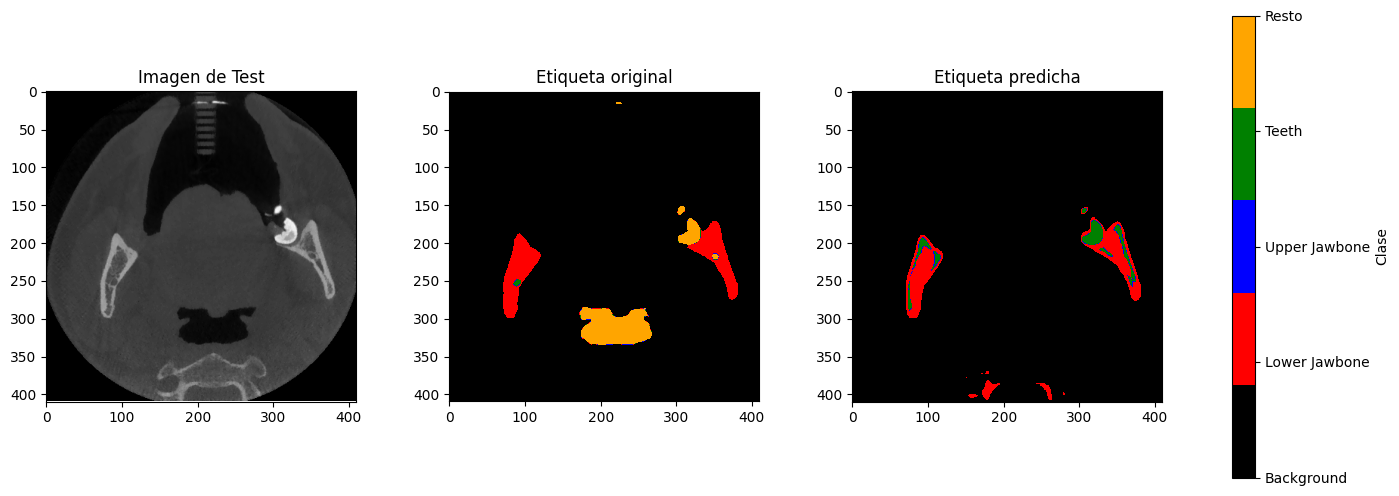

In [ ]:
# Ejemplo de uso de la función
file_name1 = 'ToothFairy2F_051100_0000.nii.gz'
file_name2 = 'ToothFairy2F_051100.nii.gz'
file_name3 = 'ToothFairy2F_051100.nii.gz'
show_two_nii_images(file_name1, file_name2, file_name3, FOLDER_IMAGES_TEST, FOLDER_LABELS_TEST_GT, FOLDER_LABELS_TEST_PREDICTIONS)

/content/drive/MyDrive/saros/nnUNet/nnUNet_raw/Dataset002_ToothFairy2/imagesTs/ToothFairy2F_051150_0000.nii.gz
/content/drive/MyDrive/saros/nnUNet/nnUNet_raw/Dataset002_ToothFairy2/labelsTs/ToothFairy2F_051150.nii.gz
/content/drive/MyDrive/saros/nnUNet/nnUNet_results/Dataset002_ToothFairy2/postprocessing/ToothFairy2F_051150.nii.gz


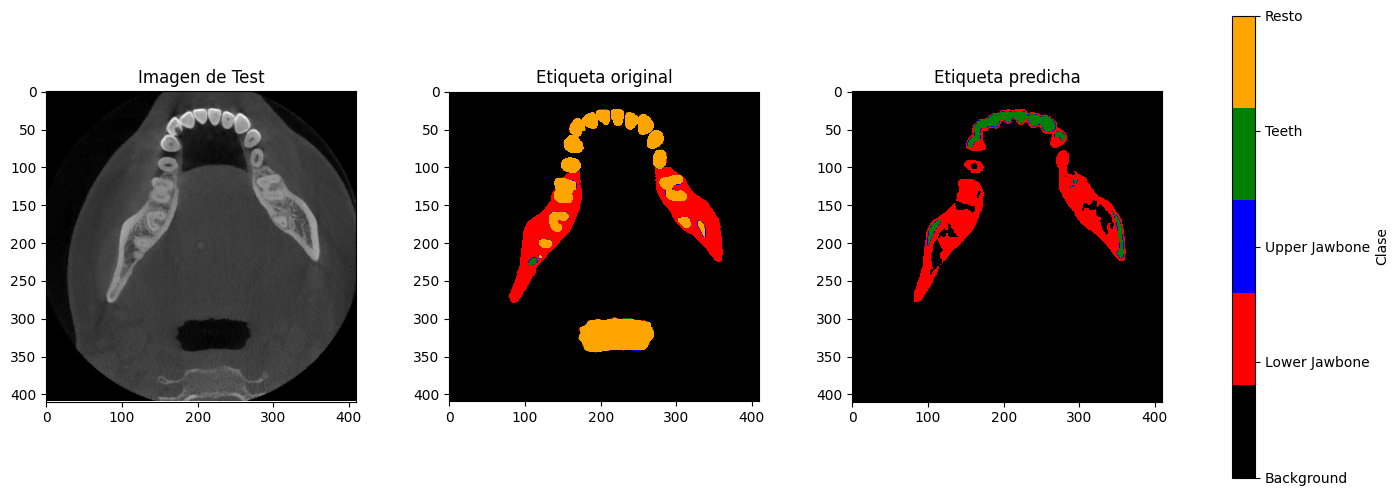

In [ ]:
# Ejemplo de uso de la función
file_name1 = 'ToothFairy2F_051150_0000.nii.gz'
file_name2 = 'ToothFairy2F_051150.nii.gz'
file_name3 = 'ToothFairy2F_051150.nii.gz'
show_two_nii_images(file_name1, file_name2, file_name3, FOLDER_IMAGES_TEST, FOLDER_LABELS_TEST_GT, FOLDER_LABELS_TEST_PREDICTIONS)

/content/drive/MyDrive/saros/nnUNet/nnUNet_raw/Dataset002_ToothFairy2/imagesTs/ToothFairy2F_051200_0000.nii.gz
/content/drive/MyDrive/saros/nnUNet/nnUNet_raw/Dataset002_ToothFairy2/labelsTs/ToothFairy2F_051200.nii.gz
/content/drive/MyDrive/saros/nnUNet/nnUNet_results/Dataset002_ToothFairy2/postprocessing/ToothFairy2F_051200.nii.gz


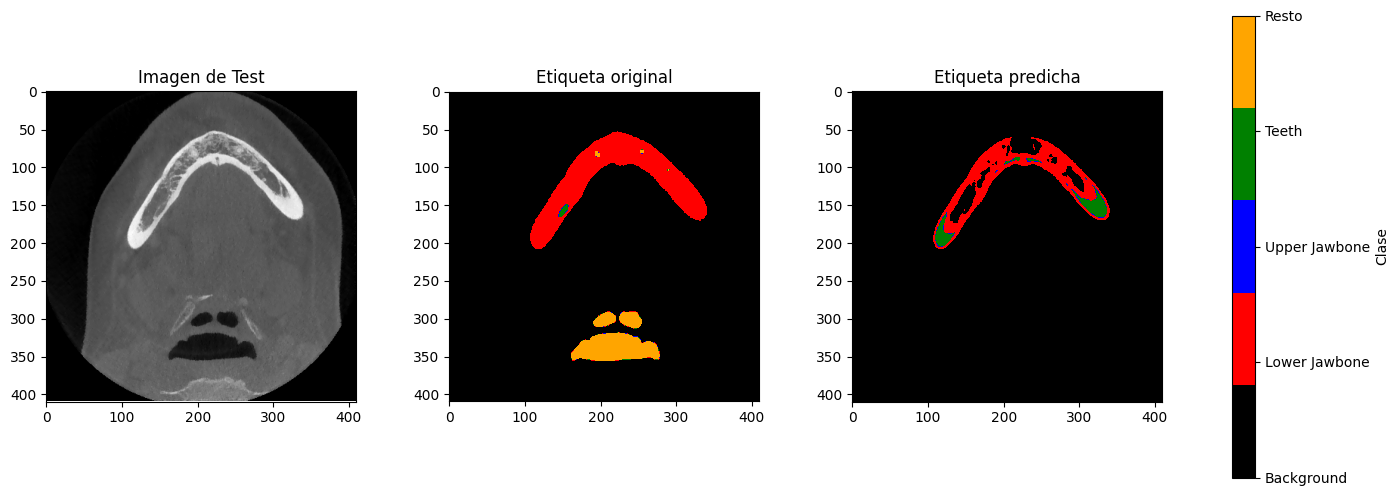

In [ ]:
# Ejemplo de uso de la función
file_name1 = 'ToothFairy2F_051200_0000.nii.gz'
file_name2 = 'ToothFairy2F_051200.nii.gz'
file_name3 = 'ToothFairy2F_051200.nii.gz'
show_two_nii_images(file_name1, file_name2, file_name3, FOLDER_IMAGES_TEST, FOLDER_LABELS_TEST_GT, FOLDER_LABELS_TEST_PREDICTIONS)

/content/drive/MyDrive/saros/nnUNet/nnUNet_raw/Dataset002_ToothFairy2/imagesTs/ToothFairy2F_051225_0000.nii.gz
/content/drive/MyDrive/saros/nnUNet/nnUNet_raw/Dataset002_ToothFairy2/labelsTs/ToothFairy2F_051225.nii.gz
/content/drive/MyDrive/saros/nnUNet/nnUNet_results/Dataset002_ToothFairy2/postprocessing/ToothFairy2F_051225.nii.gz


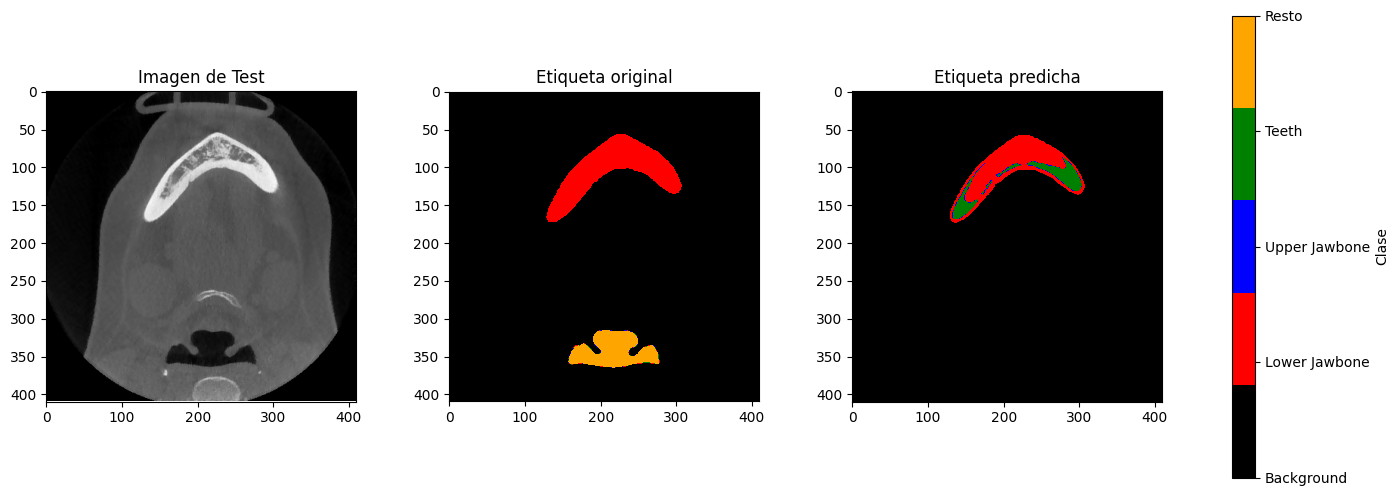

In [ ]:
# Ejemplo de uso de la función
file_name1 = 'ToothFairy2F_051225_0000.nii.gz'
file_name2 = 'ToothFairy2F_051225.nii.gz'
file_name3 = 'ToothFairy2F_051225.nii.gz'
show_two_nii_images(file_name1, file_name2, file_name3, FOLDER_IMAGES_TEST, FOLDER_LABELS_TEST_GT, FOLDER_LABELS_TEST_PREDICTIONS)